In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adam

In [ ]:
# GILGIT-BALTISTAN : 

Saving Gilgitt-Baltistan_Updated.csv to Gilgitt-Baltistan_Updated (1).csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              183 non-null    datetime64[ns]
 1   Province_State                    183 non-null    object        
 2   Confirmed Cases (n)               183 non-null    int64         
 3   Recovered Cases (n)               183 non-null    int64         
 4   Active Cases (n)                  183 non-null    int64         
 5   Temp (DegC)                       183 non-null    float64       
 6   Wind (Km/Hr)                      183 non-null    float64       
 7   Hum (%)                           183 non-null    float64       
 8   Mask Use (%)                      183 non-null    float64       
 9   Change in Mobility / Soc Dis (%)  183 non-nu

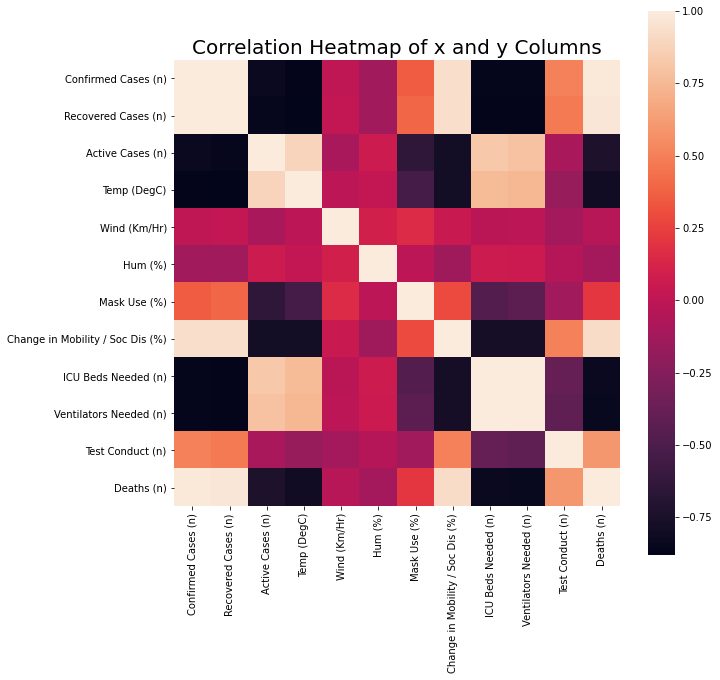

,Confirmed Cases (n),Recovered Cases (n),Active Cases (n),Temp (DegC),Wind (Km/Hr),Hum (%),Mask Use (%),Change in Mobility / Soc Dis (%),ICU Beds Needed (n),Ventilators Needed (n),Test Conduct (n),Deaths (n)
Confirmed Cases (n),1.000000,0.998864,-0.830007,-0.866184,0.007733,-0.128965,0.360983,0.939186,-0.860640,-0.861311,0.505470,0.983153
Recovered Cases (n),0.998864,1.000000,-0.855614,-0.879854,0.016089,-0.125635,0.391100,0.938901,-0.869076,-0.867436,0.476747,0.975095
Active Cases (n),-0.830007,-0.855614,1.000000,0.887570,-0.101170,0.065430,-0.645204,-0.789093,0.826487,0.800815,-0.095015,-0.737703
Temp (DegC),-0.866184,-0.879854,0.887570,1.000000,-0.009694,0.021005,-0.535309,-0.785727,0.764146,0.747576,-0.168902,-0.795200
Wind (Km/Hr),0.007733,0.016089,-0.101170,-0.009694,1.000000,0.095895,0.161420,0.048815,-0.016898,-0.006968,-0.113588,-0.030993
Hum (%),-0.128965,-0.125635,0.065430,0.021005,0.095895,1.000000,-0.008198,-0.139638,0.061616,0.055649,-0.040869,-0.117701
Mask Use (%),0.360983,0.391100,-0.645204,-0.535309,0.161420,-0.008198,1.000000,0.293887,-0.472333,-0.430152,-0.124894,0.212988
Change in Mobility / Soc Dis (%),0.939186,0.938901,-0.789093,-0.785727,0.048815,-0.139638,0.293887,1.000000,-0.771925,-0.770264,0.507731,0.922807
ICU Beds Needed (n),-0.860640,-0.869076,0.826487,0.764146,-0.016898,0.061616,-0.472333,-0.771925,1.000000,0.997691,-0.380647,-0.826309
Ventilators Needed (n),-0.861311,-0.867436,0.800815,0.747576,-0.006968,0.055649,-0.430152,-0.770264,0.997691,1.000000,-0.410365,-0.837396


In [ ]:
# preparing data

from google.colab import files
uploaded = files.upload()
df_gb = pd.read_csv(list(uploaded.keys())[0], parse_dates=['Date'])

print('\n')
print(df_gb.info());
print('\n')
print(df_gb.describe())

dff = df_gb.corr()

fig1 = plt.figure(figsize = (10,10));
plt.title('Correlation Heatmap of x and y Columns', fontsize=20);
sb.heatmap(dff, square = True);
plt.show();

dff

In [ ]:
# data pre processing 

x = df_gb.iloc[:, 2:-1]
y = df_gb.iloc[:, -1] 

x = x.drop(['Wind (Km/Hr)','Hum (%)'], axis = 1)

print('x data shape : ' , x.shape)
print('y data shape : ' , y.shape)
print('\n')

# xtr, xts, ytr, yts = train_test_split(x, y, test_size=0.1, random_state=1)

tr_sz = int(0.8*len(y))
xtr = x.iloc[0:tr_sz , :]
ytr = y[0:tr_sz]
xts = x.iloc[tr_sz: , :]
yts = y[tr_sz:]

print('x-train data shape : ' , xtr.shape)
print('x-test data shape : ' , xts.shape)
print('y-train data shape : ' , ytr.shape)
print('y-test data shape : ' , yts.shape)

x data shape :  (183, 9)
y data shape :  (183,)


x-train data shape :  (146, 9)
x-test data shape :  (37, 9)
y-train data shape :  (146,)
y-test data shape :  (37,)


In [ ]:
# solving via conventional machine learning model : 

reg = LinearRegression() 
reg.fit(xtr , ytr) 

print('\n Actual-y  : \n' , yts.values)

ypr = reg.predict(xts); # y_predicted 
print('\n Predicted-y using lin reg: \n' , np.round(ypr,2))

ytss = np.array(yts); 
res = np.zeros(len(yts));
for i in range(len(yts)): 
  res[i]=(np.abs(ytss[i]-ypr[i])/ytss[i])
err = np.sum(res)/len(yts)
print('\nAccuracy obt from lin reg model : ', (1-np.round(err,2))*100,' %')


 Actual-y  : 
 [ 96  96  96  97  97  97  97  97  97  98  98  98  98  98  98  98  98  98
  99  99  99  99  99  99  99  99  99  99  99  99 101 101 101 101 101 101
 101]

 Predicted-y using lin reg: 
 [ 96.  96.  96.  97.  97.  97.  97.  97.  97.  98.  98.  98.  98.  98.
  98.  98.  98.  98.  99.  99.  99.  99.  99.  99.  99.  99.  99.  99.
  99.  99. 101. 101. 101. 101. 101. 101. 101.]

Accuracy obt from lin reg model :  100.0  %


In [ ]:
# # solving via deep nueral network :  

model = Sequential()

model.add(Dense(128, kernel_initializer='normal',input_shape=(x.shape[1],), activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(1, kernel_initializer='normal',activation='linear', name='output'))

# optimizer = Adam(lr=0.01)
# optimizer = RMSprop(lr=0.01)
# optimizer = SGD(lr=0.01)
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_squared_error'])
print(model.summary())

model.fit(xtr, ytr, batch_size=5, epochs=250)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               1280      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
output (Dense)               (None, 1)                 257       
Total params: 34,561
Trainable params: 34,561
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/250
30/30 [==============================] - 0s 1ms/step - loss: 20.4102 - mean_squared_error: 850.7667
Epoch 2/250
30/30 [==============================] - 0s 1ms/step - loss: 5.4278 - mean_squared_error: 41.3093
Epoch 3/250
30/30 [==============================] - 0s 1ms/step - loss: 6.1798 - mean_squared_error: 53.6068
Epoch 4/250
30/30 [========================

In [ ]:
ypred = model.predict(xts)

ya_gb = np.array(yts)
yp_gb = np.array(ypred)

print('\nya_gb ~vs~ yp_gb')
for i in range(len(yts)): 
  print(ya_gb[[i]],'vs',yp_gb[i]) 

res = np.zeros(len(yts));
for i in range(len(yts)): 
  res[i]=(np.abs(ya_gb[i]-yp_gb[i])/ya_gb[i])

err_gb = np.sum(res)/len(yts)
print('\nAccuracy obt from deep nueral network : ', (1-np.round(err_gb,2))*100,' %')


ya_gb ~vs~ yp_gb
[96] vs [94.227394]
[96] vs [94.87099]
[96] vs [95.8709]
[97] vs [95.529526]
[97] vs [96.481]
[97] vs [96.24152]
[97] vs [96.92387]
[97] vs [96.77004]
[97] vs [97.50637]
[98] vs [95.97894]
[98] vs [96.01331]
[98] vs [96.56188]
[98] vs [96.62586]
[98] vs [97.07983]
[98] vs [97.03935]
[98] vs [96.867455]
[98] vs [96.047935]
[98] vs [95.341484]
[99] vs [95.08366]
[99] vs [95.66041]
[99] vs [94.737045]
[99] vs [93.79307]
[99] vs [94.065956]
[99] vs [94.2197]
[99] vs [94.04415]
[99] vs [94.22095]
[99] vs [95.51148]
[99] vs [94.63699]
[99] vs [94.63404]
[99] vs [94.86536]
[101] vs [94.08666]
[101] vs [94.15495]
[101] vs [94.15409]
[101] vs [94.12767]
[101] vs [93.833275]
[101] vs [93.623604]
[101] vs [93.896706]

Accuracy obt from deep nueral network :  97.0  %


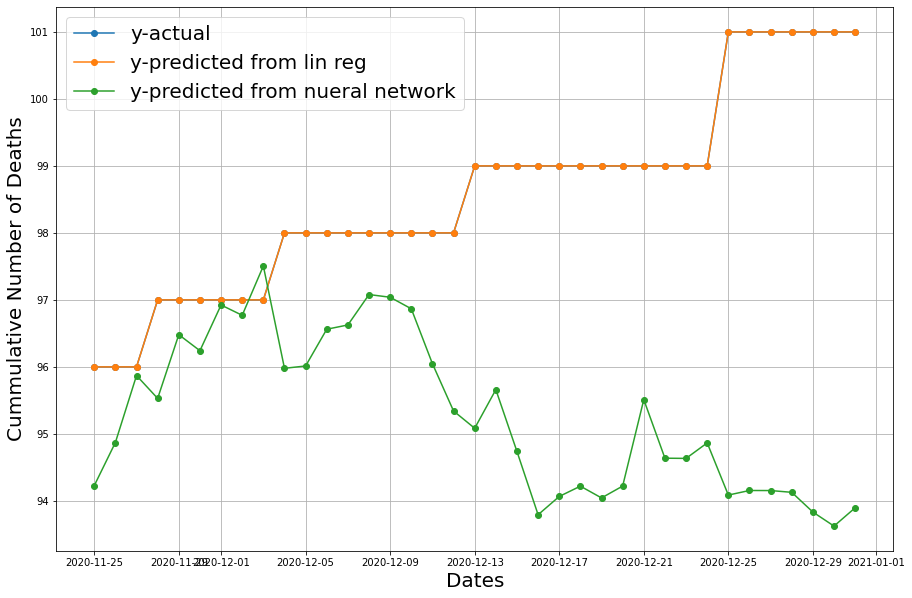

In [ ]:
dts = df_gb['Date']
end_dts = dts[tr_sz:]

fig2 = plt.figure(figsize = (15,10))
plt.plot(end_dts , ya_gb, '-o',label='y-actual');
plt.plot(end_dts , ypr, '-o',label='y-predicted from lin reg');
plt.plot(end_dts , yp_gb, '-o',label='y-predicted from nueral network');
plt.grid(); plt.legend(prop={'size': 20});
plt.xlabel('Dates',fontsize=20); 
plt.ylabel('Cummulative Number of Deaths',fontsize=20); 